# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

2024-08-05 00:16:26.337696: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np
import pickle

Training set shape: (50000, 32, 32, 3), (50000, 1)
Test set shape: (10000, 32, 32, 3), (10000, 1)
Image dimensions: (32, 32, 3)
Number of classes: 100


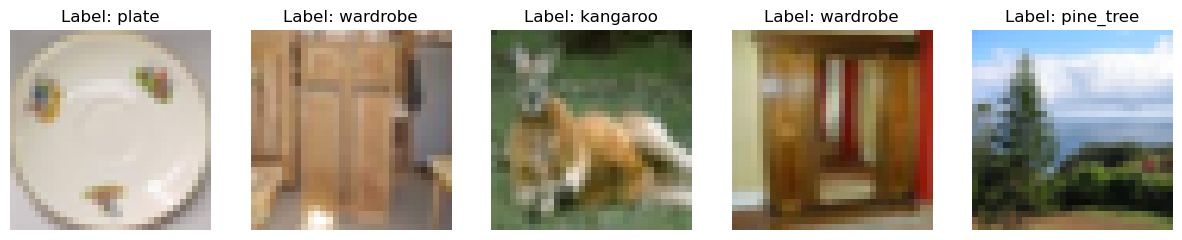

In [5]:
# shape of the training and test sets
print(f'Training set shape: {x_train.shape}, {y_train.shape}')
print(f'Test set shape: {x_test.shape}, {y_test.shape}')

# dimensions of the images
print(f'Image dimensions: {x_train.shape[1:]}')

# number of classes
num_classes = len(np.unique(y_train))
print(f'Number of classes: {num_classes}')

# Function to load label names
def load_label_names():
    with open("cifar-100-python/meta", "rb") as file:
        data = pickle.load(file, encoding="bytes")
        fine_label_names = data[b'fine_label_names']
        # Convert byte strings to regular strings
        fine_label_names = [name.decode("utf-8") for name in fine_label_names]
    return fine_label_names

# Get the label names
label_names = load_label_names()

# Randomly select 5 examples
random_indices = np.random.choice(len(x_train), 5, replace=False)

# Plot the images with their label names
plt.figure(figsize=(15, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[idx])
    plt.title(f"Label: {label_names[y_train[idx][0]]}")
    plt.axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
# Your code here
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print shapes of the new datasets
print(f'Training set shape: {x_train.shape}, {y_train.shape}')
print(f'Validation set shape: {x_val.shape}, {y_val.shape}')
print(f'Test set shape: {x_test.shape}, {y_test.shape}')

Training set shape: (40000, 32, 32, 3), (40000, 100)
Validation set shape: (10000, 32, 32, 3), (10000, 100)
Test set shape: (10000, 32, 32, 3), (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Your code here
# Initialize the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=100, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______Categorical Crossentropy: it is commonly used for multi-class classification problems.
- <b>Optimizer:</b> ______Adam: it combines the advantages of two other extensions of stochastic gradient descent: Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp). It computes adaptive learning rates for each parameter and tends to converge faster and more efficiently.

In [8]:
from keras import optimizers

# Your code here
from keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment. In class we chose epoches = 15, this is a balanced number to prevent overfitting, observe learning curves, and optimize computational resources. 
- Use a batch size of 32.
- Use the validation set for validation.

Epoch 1/15
1250/1250 [==============================] - 56s 43ms/step - loss: 3.9760 - accuracy: 0.0919 - val_loss: 3.4868 - val_accuracy: 0.1636
Epoch 2/15
1250/1250 [==============================] - 62s 49ms/step - loss: 3.2882 - accuracy: 0.2033 - val_loss: 3.1911 - val_accuracy: 0.2244
Epoch 3/15
1250/1250 [==============================] - 62s 50ms/step - loss: 2.9874 - accuracy: 0.2601 - val_loss: 2.9469 - val_accuracy: 0.2712
Epoch 4/15
1250/1250 [==============================] - 52s 41ms/step - loss: 2.7552 - accuracy: 0.3044 - val_loss: 2.7931 - val_accuracy: 0.2995
Epoch 5/15
1250/1250 [==============================] - 43s 35ms/step - loss: 2.5800 - accuracy: 0.3438 - val_loss: 2.6853 - val_accuracy: 0.3263
Epoch 6/15
1250/1250 [==============================] - 44s 35ms/step - loss: 2.4290 - accuracy: 0.3755 - val_loss: 2.6840 - val_accuracy: 0.3255
Epoch 7/15
1250/1250 [==============================] - 45s 36ms/step - loss: 2.2925 - accuracy: 0.4035 - val_loss: 2.6858 -

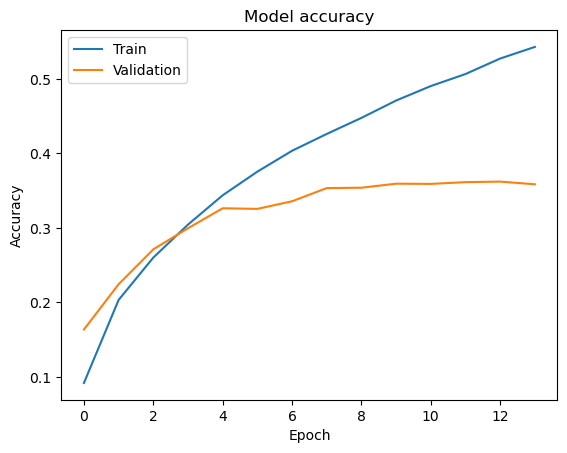

In [10]:
# Your code here
from keras.callbacks import EarlyStopping

epochs = 15  

# Use early stopping to stop training when validation performance stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

# Plot training & validation accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______36%
- <b>Other metric:</b> ______F1 score
- <b>Reason for selection:</b> _____Because it balances precision and recall, providing a single metric that accounts for both false positives and false negatives. This is particularly useful in multi-class classification problems where some classes may be harder to classify correctly.
- <b>Value of metric:</b> ______Macro F1-Score: 0.35; Weighted F1-Score: 0.35
- <b>Interpretation of metric value:</b> ______ The macro F1-score is the average F1-score for each class.A macro F1-score of 0.35 indicates that, on average, the model's precision and recall for each class are relatively low. \
The weighted F1-score takes into account the number of instances for each class when averaging the F1-scores. A weighted F1-score of 0.35 indicates that, when considering the frequency of each class, the model still has low precision and recall on average. 

In [11]:
# Your code here
from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy on test set: {test_accuracy:.4f}')

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
print('Classification Report:')
print(classification_report(y_true_classes, y_pred_classes))


313/313 [==============================] - 4s 12ms/step - loss: 2.5705 - accuracy: 0.3608
Accuracy on test set: 0.3608
313/313 [==============================] - 4s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.69      0.64       100
           1       0.39      0.36      0.38       100
           2       0.25      0.20      0.22       100
           3       0.24      0.20      0.22       100
           4       0.17      0.12      0.14       100
           5       0.26      0.21      0.23       100
           6       0.33      0.45      0.38       100
           7       0.35      0.47      0.40       100
           8       0.36      0.49      0.41       100
           9       0.47      0.46      0.46       100
          10       0.32      0.17      0.22       100
          11       0.19      0.32      0.24       100
          12       0.37      0.40      0.38       100
          13       0.40      0.21      0.28  

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?\
The model predicted "Bridge" for an image labeled "Mountain." The confusion might arise from visual similarities in texture, color, or structure between the images of mountains and bridges.\
The probabilities indicate the model's level of confidence for each class. This plot has a spread-out probabilities, some labels also have high probabilities.

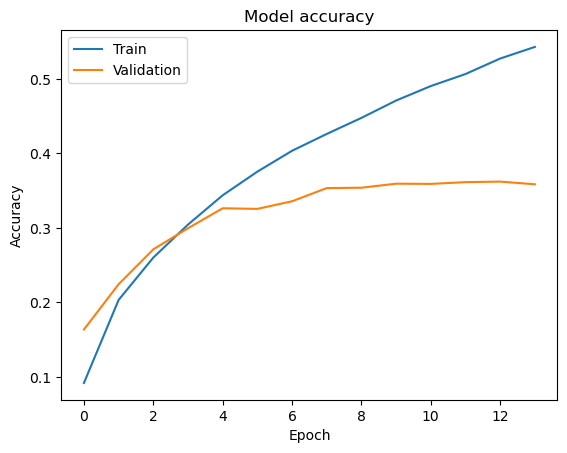

In [12]:
# Your code here
#I already plotted it when train the model

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Correctly Classified Image:
1/1 [==============================] - 0s 30ms/step


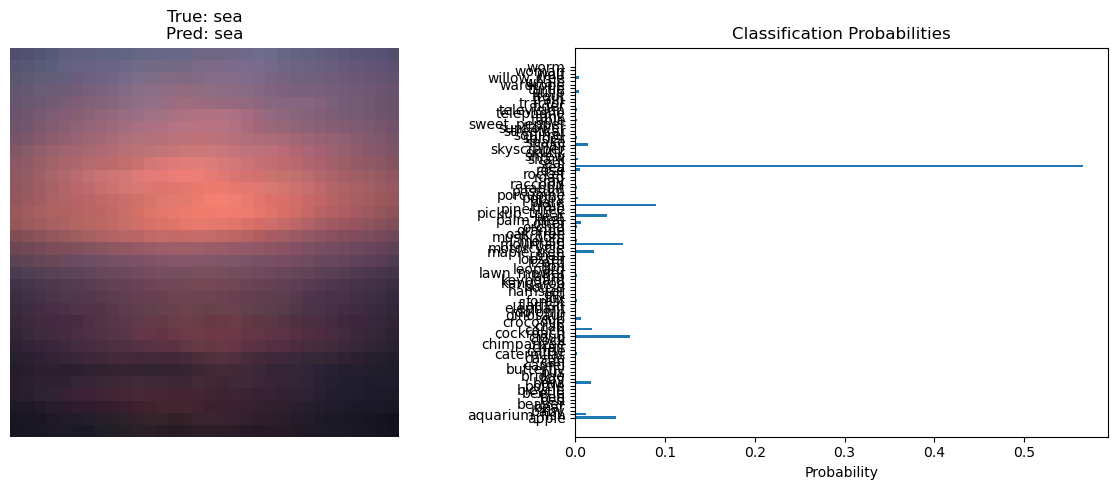

Incorrectly Classified Image:
1/1 [==============================] - 0s 31ms/step


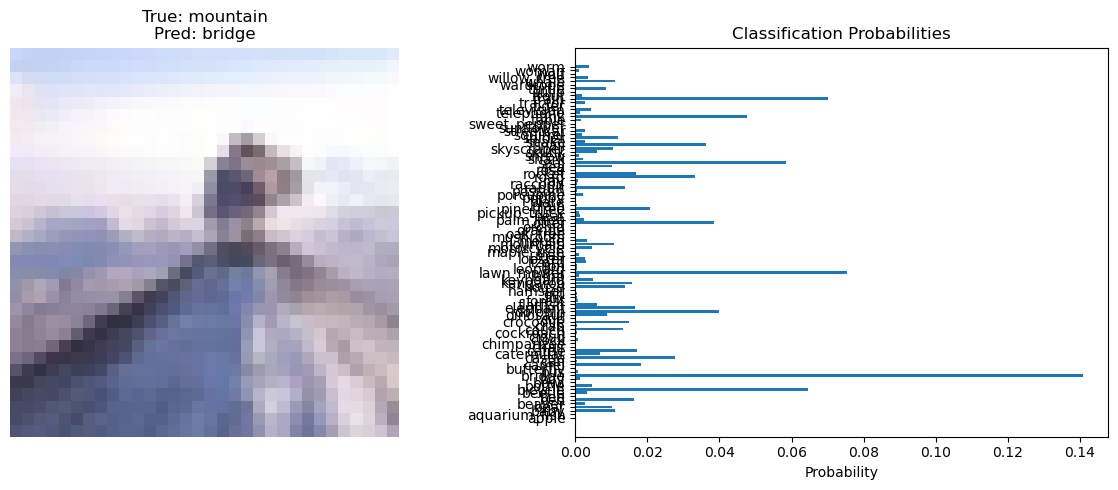

In [13]:
# Identify correctly and incorrectly classified images
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Select one example
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

def plot_image_with_probabilities(idx, x_test, y_true, y_pred, label_names):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(x_test[idx])
    true_label = label_names[y_true[idx]]
    predicted_label = label_names[y_pred[idx]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

    # Plot the classification probabilities
    plt.subplot(1, 2, 2)
    probs = model.predict(np.expand_dims(x_test[idx], axis=0))[0]
    plt.barh(range(len(label_names)), probs)
    plt.yticks(range(len(label_names)), label_names)
    plt.title("Classification Probabilities")
    plt.xlabel("Probability")
    plt.tight_layout()
    plt.show()

print("Correctly Classified Image:")
plot_image_with_probabilities(correct_idx, x_test, y_true_classes, y_pred_classes, label_names)

print("Incorrectly Classified Image:")
plot_image_with_probabilities(incorrect_idx, x_test, y_true_classes, y_pred_classes, label_names)

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

To improve the model's performance, I add Dropout to enhance the model's ability to generalize and prevent overfitting.

Dropout prevents neurons from becoming overly dependent on other specific neurons, encouraging the network to learn more robust features.\
It helps in preventing overfitting, especially in deep neural networks. By randomly dropping units, it forces the model to learn redundant representations, which enhances its ability to generalize to unseen data.\
Dropout Rates 0.5 for dense layers: We use it at class.

In [20]:
# Your code here
from keras.layers import Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

# Dense Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization

# Output Layer
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 128)        

In [21]:
from keras import optimizers
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [22]:
# Your code here
from keras.callbacks import EarlyStopping
epochs = 15
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using the data generator
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(x_val, y_val),
)

Epoch 1/15
1250/1250 [==============================] - 118s 93ms/step - loss: 4.1138 - accuracy: 0.0655 - val_loss: 3.6025 - val_accuracy: 0.1387
Epoch 2/15
1250/1250 [==============================] - 113s 91ms/step - loss: 3.5376 - accuracy: 0.1570 - val_loss: 3.2036 - val_accuracy: 0.2205
Epoch 3/15
1250/1250 [==============================] - 92s 74ms/step - loss: 3.2193 - accuracy: 0.2125 - val_loss: 2.9271 - val_accuracy: 0.2755
Epoch 4/15
1250/1250 [==============================] - 86s 68ms/step - loss: 3.0188 - accuracy: 0.2521 - val_loss: 2.7921 - val_accuracy: 0.3060
Epoch 5/15
1250/1250 [==============================] - 90s 72ms/step - loss: 2.8569 - accuracy: 0.2816 - val_loss: 2.6588 - val_accuracy: 0.3286
Epoch 6/15
1250/1250 [==============================] - 86s 69ms/step - loss: 2.7238 - accuracy: 0.3069 - val_loss: 2.6383 - val_accuracy: 0.3394
Epoch 7/15
1250/1250 [==============================] - 87s 69ms/step - loss: 2.5970 - accuracy: 0.3321 - val_loss: 2.5650

313/313 [==============================] - 6s 18ms/step - loss: 2.4721 - accuracy: 0.3916
Accuracy on test set: 0.3916
313/313 [==============================] - 5s 16ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       100
           1       0.41      0.47      0.44       100
           2       0.40      0.19      0.26       100
           3       0.26      0.16      0.20       100
           4       0.19      0.16      0.17       100
           5       0.33      0.34      0.33       100
           6       0.31      0.44      0.37       100
           7       0.40      0.51      0.45       100
           8       0.35      0.47      0.40       100
           9       0.49      0.50      0.49       100
          10       0.23      0.22      0.22       100
          11       0.25      0.18      0.21       100
          12       0.41      0.44      0.42       100
          13       0.33      0.35      0.34  

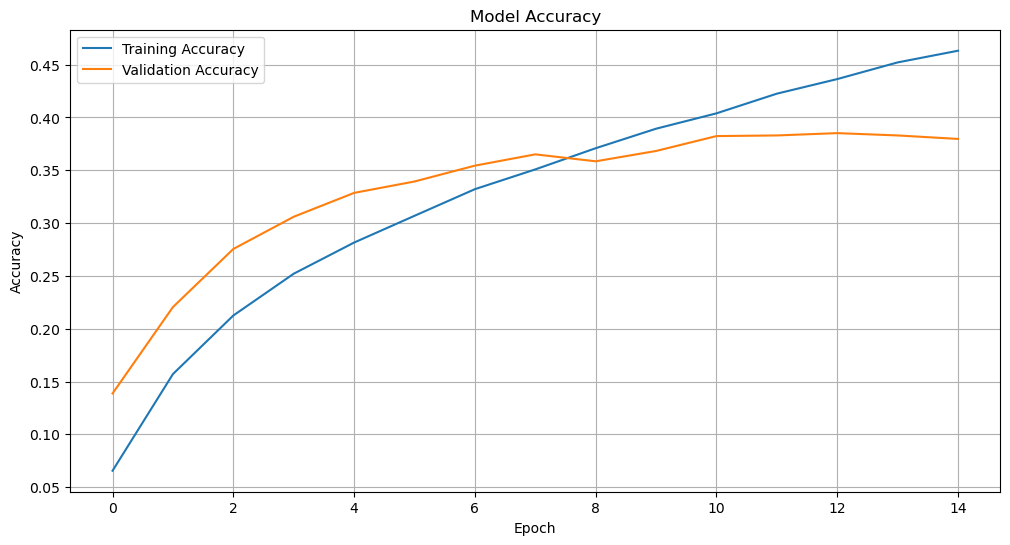

In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy on test set: {test_accuracy:.4f}')

# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate a classification report
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
print('Classification Report:')
print(classification_report(y_true_classes, y_pred_classes))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Correctly Classified Image:
1/1 [==============================] - 0s 28ms/step


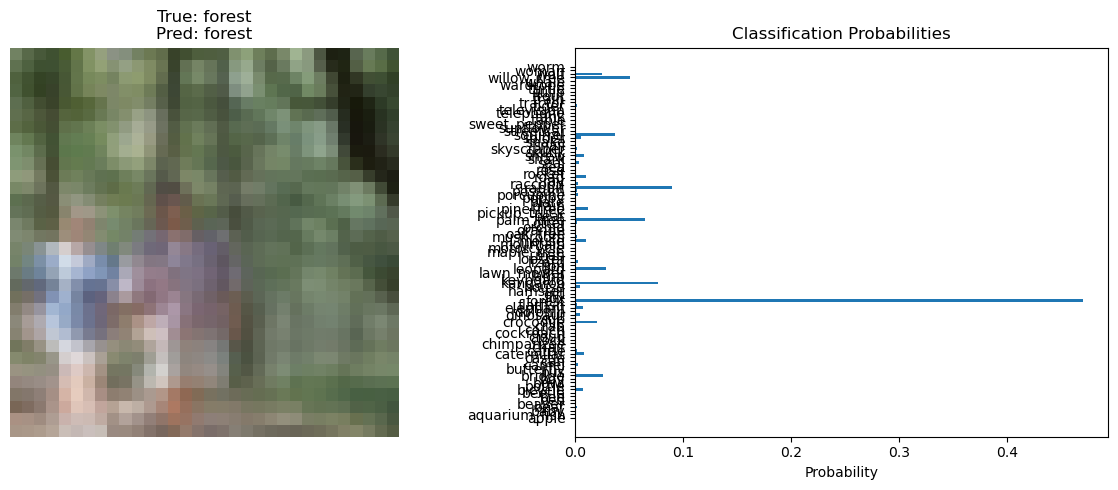

Incorrectly Classified Image:
1/1 [==============================] - 0s 44ms/step


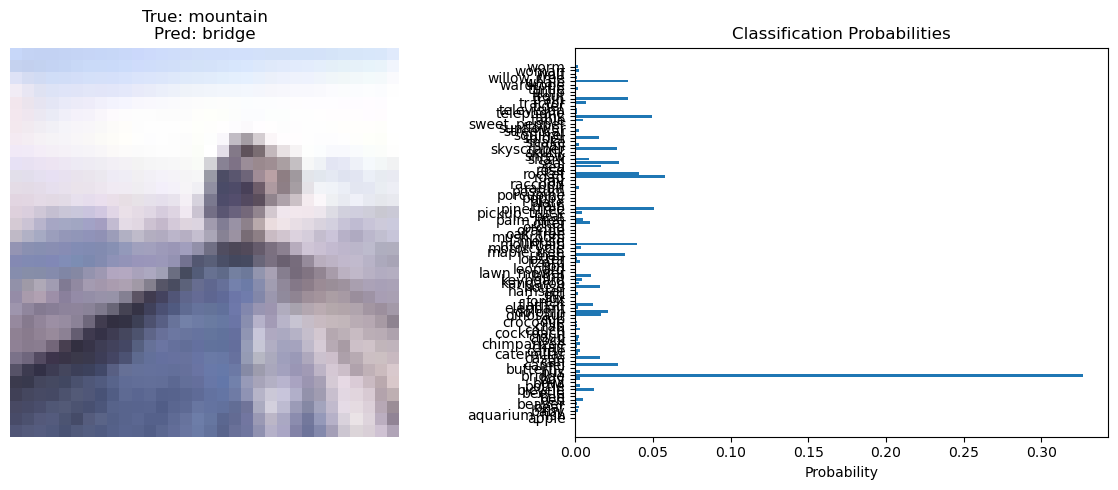

In [24]:
# Identify correctly and incorrectly classified images
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Select one example
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

def plot_image_with_probabilities(idx, x_test, y_true, y_pred, label_names):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(x_test[idx])
    true_label = label_names[y_true[idx]]
    predicted_label = label_names[y_pred[idx]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

    # Plot the classification probabilities
    plt.subplot(1, 2, 2)
    probs = model.predict(np.expand_dims(x_test[idx], axis=0))[0]
    plt.barh(range(len(label_names)), probs)
    plt.yticks(range(len(label_names)), label_names)
    plt.title("Classification Probabilities")
    plt.xlabel("Probability")
    plt.tight_layout()
    plt.show()

print("Correctly Classified Image:")
plot_image_with_probabilities(correct_idx, x_test, y_true_classes, y_pred_classes, label_names)

print("Incorrectly Classified Image:")
plot_image_with_probabilities(incorrect_idx, x_test, y_true_classes, y_pred_classes, label_names)

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The model's performance improve a little, the model's accuracy on the test set improved from 0.36 to 0.39, and the F1-score increased from 0.35 to 0.39. This indicates a modest improvement in the model's performance.\
The addition of Dropout likely contributed to better generalization by preventing overfitting. Dropout forces the model to learn more robust features by randomly omitting units during training.

Yes, there is room for further improvement. The current accuracy and F1-score suggest that the model can still benefit from additional optimization. For example, we can use Data Augmentation to enhance the diversity of training data by applying transformations such as rotations, shifts, and flips. This can help the model generalize better to unseen data. Also, Batch Normalization can be used to batch normalization layers to stabilize and accelerate training by normalizing the inputs of each layer.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.